In [61]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit

import matplotlib.pyplot as pl

%matplotlib inline


In [62]:
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y


d = pd.read_csv('/Users/knapen/projects/attention_size/exp/data/tk_1_2018-04-29_12.06.40.tsv', sep='\t')

In [63]:
d.head()
condition = 'fix_trial_stimulus_value'

In [64]:
sd = pd.DataFrame([d[condition], d['answer']]).T
sd = sd[sd['answer']!=-1]
gr = sd.groupby(condition)

In [65]:
x_axis_values = sd[condition].unique()
x_axis_values.sort()
y_values = np.array(gr.mean()).ravel()

In [66]:
popt, pcov = curve_fit(sigmoid, x_axis_values, y_values)

In [67]:
x_continuous = np.linspace(x_axis_values.min(), x_axis_values.max(), 1000)
y_continuous = sigmoid(x, *popt)

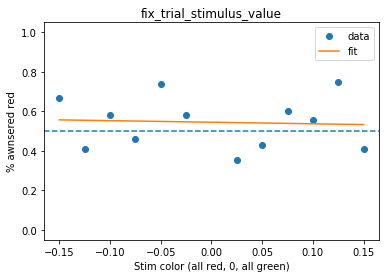

In [68]:
pl.plot(x_axis_values, y_values, 'o', label='data')
pl.plot(x_continuous, y_continuous, label='fit')
pl.axhline(y=0.5, linestyle='dashed')
pl.gca().set_ylim([-0.05,1.05])
pl.gca().set_xlabel('Stim color (all red, 0, all green)')
pl.gca().set_ylabel('% awnsered red')
pl.gca().legend(loc='best')
pl.gca().set_title(condition)